In [2]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# standard magic
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# disable warnings
import warnings
warnings.filterwarnings('ignore')

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

In [3]:
#Data
root='C:/Users/Allen Tao/Desktop/FRE 7773/Assignments/A4/A4 Data/'
data1=pd.read_csv(root+'dataset1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:, 2]

def visData(x, y):
    """
    generate plot of data
    input: x, y feature and tgt arrays
    output: None. generate a plot.
    """
    rcParams['figure.figsize'] = 8, 6
    plt.grid()
    plt.scatter(x.iloc[:,0], x.iloc[:,1], s=50, c=y, cmap=plt.cm.get_cmap('coolwarm', 2))
    
    return None


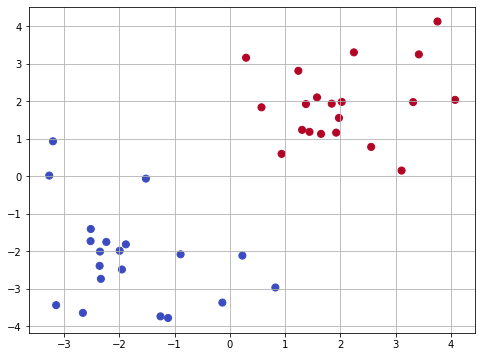

In [4]:
visData(X, Y)

In [5]:
data1.head()

,x1,x2,y
0,-2.515039,-1.408103,0
1,-1.952127,-2.488405,0
2,-2.354953,-2.391813,0
3,-0.135739,-3.371490,0
4,0.226275,-2.118110,0


#### Solution:

1.
(a).

Quote 

https://stackoverflow.com/questions/23794277/extract-decision-boundary-with-scikit-learn-linear-svm

https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0

In [76]:
# build model, fit x, y
from sklearn import svm

# use func to do it
def fitSVM(x, y, c, k='linear', d=3):
    """
    create a svc (default linear, C = c)
    input: x, y: feature, target arrays; c: float
    output: return fitted model
    """
    lsvm = svm.SVC(kernel=k, C=c, degree=d)
    tmodel = lsvm.fit(x, y)
    return tmodel

In [7]:
t1 = fitSVM(X, Y, 100000)

In [8]:
# func to  separating hyperplane
def sepHP(model):
    """
    print separating hyperplane of fitted linear svm 
    input: fitted linear svm model
    output: None. Print a formatted string.
    """
    print(f'Separating hyperplane: y = - {model.coef_[0,0] / model.coef_[0,1]} * x - {model.intercept_[0] / model.coef_[0,1]}')


In [9]:
sepHP(t1)

Separating hyperplane: y = - 1.176893160871018 * x - 0.07665041864575746


(b).

In [10]:
# func to report margin
def mar(model):
    """
    return margin of linear svm
    input: linear svm, fitted
    output: float, margin
    """
    margin = 1 / np.sqrt(np.sum(model.coef_[0] ** 2))
    
    return margin

In [11]:
print(f'Margin: {mar(t1)}')

Margin: 1.1488996752138216


(c).

In [12]:
# func to report sv
def svector(model):
    """
    return sv of linear svm, contained in pd df
    """
    sv = pd.DataFrame(t1.support_vectors_, columns=['x1', 'x2'])
    
    return sv

In [13]:
print('Support vectors:')
print(svector(t1))

Support vectors:
         x1        x2
0  0.226275 -2.118110
1 -1.518036 -0.063994
2  0.935646  0.596936


In [14]:
# func to link the above 3 parts
def anaSVM(model):
    """
    print sepHP; return margin, sv
    """
    sepHP(model)
    margin = mar(model)
    sv = svector(model)
    return margin, sv

2.Plot

In [15]:
def visSVM(model, x, y):
    """
    generate a plot to visualize the separation of a given linear SVM model
    Input: fitted linear SVM model with 2 features. x, y used to generate the plot for all points
    output: None. generate a plot.
    """
    
    visData(x, y)
    
    # construct and plot hyperplane
    xmin = min(x.min())
    xmax = max(x.max())
    xp = np.linspace(xmin - 1, xmax + 1)
    yp = - (model.coef_[0,0] / model.coef_[0,1]) * xp - model.intercept_[0] / model.coef_[0,1]
    plt.plot(xp, yp, c='black')

    # cal and plot margin
    w_hat = model.coef_[0] / np.sqrt(np.sum(model.coef_[0] ** 2))
    boundary = np.array(list(zip(xp, yp)))
    pabove = boundary + w_hat * mar(model)
    pbelow = boundary - w_hat * mar(model)
    plt.plot(pabove[:, 0], pabove[:, 1], '--', c='grey')
    plt.plot(pbelow[:, 0], pbelow[:, 1], '--', c='grey')

    # circle supports
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150, facecolors='None', edgecolors='k', alpha=.5)
    
    return None

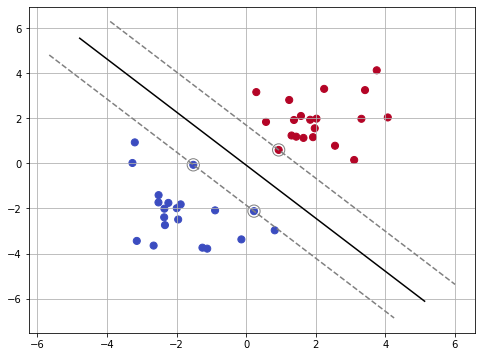

In [16]:
visSVM(t1, X, Y)

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


In [17]:
#Data
data2=pd.read_csv(root+'dataset2.csv')
X2=data2.iloc[:,:2]
Y2=data2.iloc[:,2]


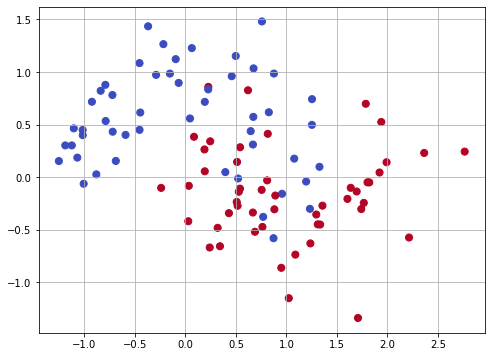

In [18]:
visData(X2, Y2)

In [19]:
# Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.33, random_state=1)

# Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
# for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

### Solutions:

(1)

In [20]:
# build model, fit x, y
t2 = fitSVM(X_train_1, Y_train_1, c=0.01)

In [21]:
# analyze new model
margin2, sv2 = anaSVM(t2)
print(f'Margin: {margin2}')
print(f'sv: {sv2}')

Separating hyperplane: y = - -0.9496693814680566 * x - -7.283299960089431
Margin: 6.4953503307805285
sv:          x1        x2
0  0.226275 -2.118110
1 -1.518036 -0.063994
2  0.935646  0.596936


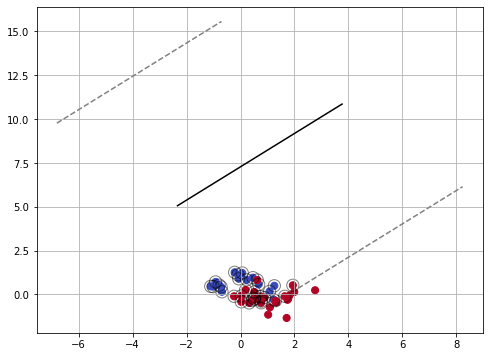

In [22]:
# visualize new model
visSVM(t2, X_train_1, Y_train_1)

^ this is trash. C is way to small

In [23]:
# func to report accuracy
def accSVM(model):
    """
    report insample/outsample accuracy
    input: fitted linear svm
    output: return isa, osa, in/out sample accuracy, both float
    """
    isa = model.score(X_train, Y_train)
    osa = model.score(X_test, Y_test)
    return isa, osa

In [24]:
# report
isa, osa = accSVM(t2)
print(f'in sample accuracy: {isa}')
print(f'out sample accuracy: {osa}')

in sample accuracy: 0.5522388059701493
out sample accuracy: 0.3939393939393939


(2)

#### (For this question people could have different C. Any C that is bigger than 1, is a safe choice. But the corresponding accuracy should be around 0.78.) 

In [77]:
import math

def optC(xt1, yt1, xt, yt, ct=[math.exp(i) for i in np.linspace(-10,5,200)], kernel='linear', degree=3):
    """
    automate c_opt searching process
    input: xt1, yt1: subset of train; xt, yt train data
    output: return df logc_acc holding c, logc, isa; float c_opt that max. isa
    """    
    # hold stuff in df
    logc_acc = pd.DataFrame(data=ct, columns=['c'])
    logc_acc['logc'] = np.log(logc_acc['c'])
    logc_acc['isa'] = np.nan

    # loop and run svm for each c
    for i, n in enumerate(ct):
        tn = fitSVM(xt1, yt1, n, k=kernel, d=degree)
        logc_acc.iloc[i, 2] = tn.score(xt, yt)
    
    # select optimal c
    c_opt = logc_acc.iloc[logc_acc.idxmax(axis=0)[0], 2]
    
    return logc_acc, c_opt

In [78]:
logc_acc, c_opt = optC(X_train_1, Y_train_1, X_train, Y_train)

In [79]:
# plot logc vs. in sample acc.
def pltAccLogc(dataframe):
    """
    plot logc vs. isa 
    input: df that contains logc_acc
    output: None, generates a graph
    """
    plt.plot(dataframe.iloc[:, 1], dataframe.iloc[:, 2])
    return None

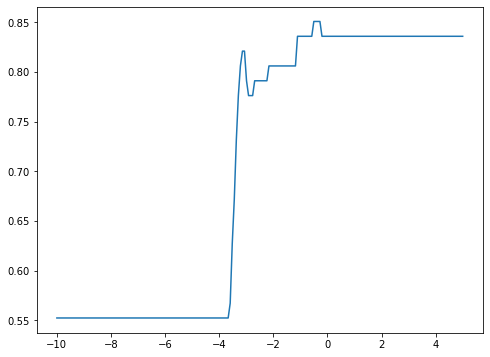

In [80]:
pltAccLogc(logc_acc)

(3)

#### (The answer could be different for people who have different optimal C. However it should be around 80 percent.)

In [28]:
# fit model
t2_opt = fitSVM(X_train_1, Y_train_1, c_opt)
isa_opt, osa_opt = accSVM(t2_opt)
print(f'the new out of sample acc. is {osa_opt}')

the new out of sample acc. is 0.8484848484848485


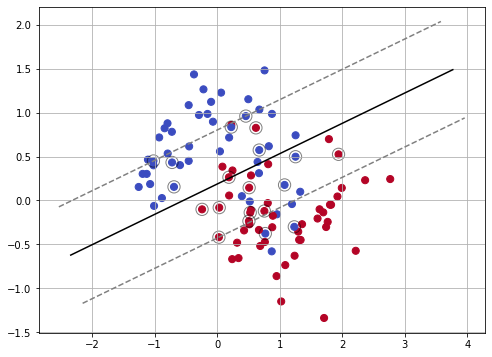

In [29]:
# out of curiosity, I visualized the model.
visSVM(t2_opt, X2, Y2)

^ now it looks decent

### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


In [30]:
#Data 
data3=pd.read_csv(root+'dataset3.csv')
X3=data3.iloc[:,:2]
Y3=data3.iloc[:,2]


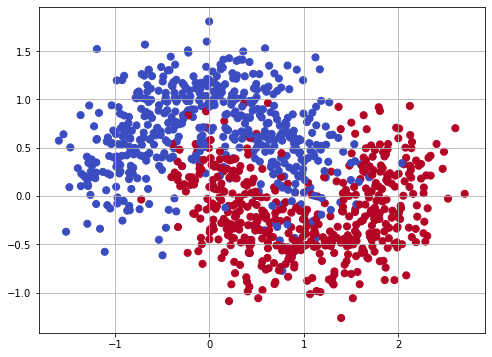

In [31]:
visData(X3, Y3)

In [32]:
#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X3, Y3, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train2_1,X_vali2,Y_train2_1,Y_vali2 = train_test_split(X_train2, Y_train2, test_size=0.33, random_state=99)

### Solutions

(1)

In [33]:
# default run
t3 = fitSVM(X_train2_1, Y_train2_1, c=0.01)

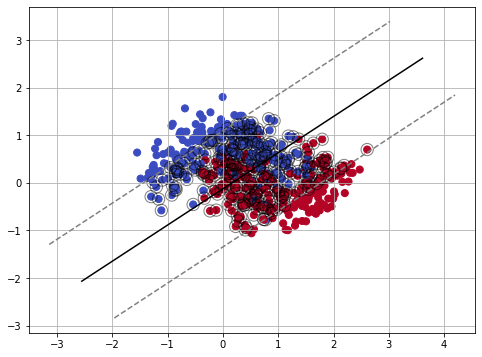

In [34]:
# visualize model
visSVM(t3, X_train2_1, Y_train2_1)

^hella ugly, but at least kinda in the middle

In [35]:
# acc scores
isa3, osa3 = accSVM(t3)
print(f'in sample accuracy: {isa}')
print(f'out sample accuracy: {osa}')

in sample accuracy: 0.5522388059701493
out sample accuracy: 0.3939393939393939


(2)
a.

#### Look carefully at the plot. Here the accuracy goes down when we increase log(C). If you choose optimal C in the end of the period when C reaches max as we did in class, you could have problems (might not, no garuantee). So you might have your own way of picking the optimal C, but you should have a similar OS result in next question. 

In [81]:
deg = [1, 2, 3, 4]
res = []
for de in deg:
    logc_acc3, c_opt3 = optC(X_train2_1, Y_train2_1, X_train2, Y_train2, ct=[math.exp(i) for i in np.linspace(-10,2*de,200)], 
                            kernel='poly', degree=de)
    res.append(logc_acc3)
    res.append(c_opt3)


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

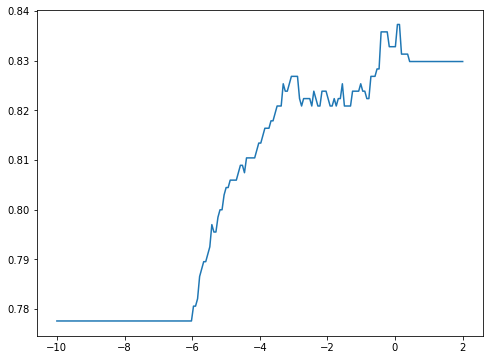

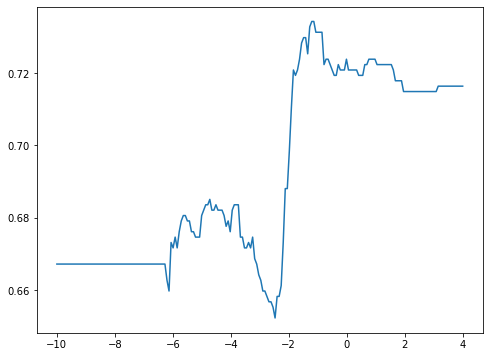

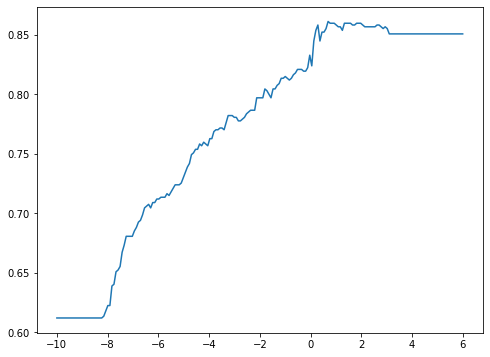

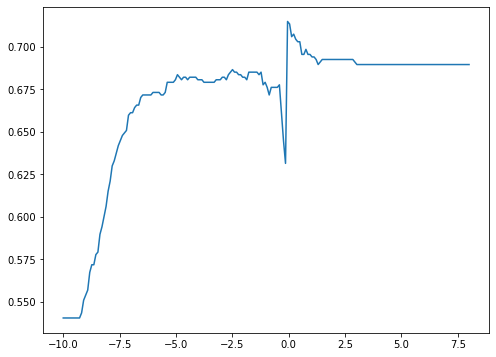

In [82]:
# plot the 4 results
for i in range(0,7,2):
    plt.figure(i)
    pltAccLogc(res[i])

In [83]:
# find the c_opt from 4 degrees
res_c = [res[1], res[3], res[5], res[7]]
res_c


[0.8298507462686567,
 0.7164179104477612,
 0.8507462686567164,
 0.6895522388059702]

^ poly deg3 yielded best result

(3)

In [85]:
c_opt3 = max(res_c)

# fit model
t3_opt = fitSVM(X_train2_1, Y_train2_1, c_opt3, k='poly', d=3)
isa3_opt, osa3_opt = accSVM(t3_opt)
print(f"the best model's out of sample acc. is {osa3_opt}")


the best model's out of sample acc. is 0.7878787878787878


In [90]:
print('Done!')

Done!
